In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [3]:
train.shape

(7377418, 6)

In [4]:
test = pd.read_csv("test.csv")
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [5]:
test.shape

(2556790, 6)

In [6]:
songs = pd.read_csv("songs.csv")

In [7]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [8]:
songs.shape

(2296320, 7)

In [9]:
members = pd.read_csv("members.csv")

In [10]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [11]:
members.shape

(34403, 7)

In [12]:
train_songs = pd.merge(train,songs,how='inner',on='song_id')
train_songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,sSexP400TJOZRhx3JB+0s9cqrCnqrlV51B9njoKR1II=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,hKdGiUKHVqKkXGHLrc+EzdSW6q0ERAJ2Cs7/L1N0Ae4=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,NaN,online-playlist,0,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [13]:
train_songs.shape

(7377304, 12)

In [14]:
test_songs = pd.merge(test,songs,how='inner',on='song_id')
test_songs.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0
1,2954,mp5bRgC7VAhEpWlAiOn4jG8CD9FJZt7725f93t5i99M=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Search,song,224130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0
2,14420,NSBR1BrOO3XDapGQCMi19nRidHD4qzoEXbGGnBap/e0=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-playlist,224130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0
3,17473,kvRxHi514EY2/4FzahC/vBf/Zn13/3ZwXweeepjewzk=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-playlist,224130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0
4,32738,Qh0RP1Refm1D6eV5PjusX+agjnNczGUR8eeWBGj3UvU=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-playlist,224130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0


In [15]:
test_songs.shape

(2556765, 12)

In [16]:
train_data=pd.merge(train_songs,members,how='inner',on='msno')
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,247803,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,181115,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,NaN,52.0,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,explore,Explore,online-playlist,0,257369,465,OneRepublic,Ryan Tedder,NaN,52.0,1,0,NaN,7,20120102,20171005


In [17]:
train_data.shape

(7377304, 18)

In [18]:
test_data=pd.merge(test_songs,members,how='inner',on='msno')
test_data.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,1,0,NaN,7,20160219,20170918
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,1,0,NaN,7,20160219,20170918
2,333,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,A4Xu2KK/i4wlarqf8SOQ61S/XTIDEaNtKSKKHWGca4w=,my library,Local playlist more,local-library,315977,465,aMEI (張惠妹),張雨生,王丹,3.0,1,0,NaN,7,20160219,20170918
3,334,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,YJKHI4Asj1oM5vJftbISis2QYliVSExtWiWnwb7TOgo=,my library,Local playlist more,local-library,206193,465,Maroon 5,Adam Levine| Jesse Carmichael| Ryan Dusick| Ja...,NaN,52.0,1,0,NaN,7,20160219,20170918
4,1092,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,pcxJbwDNuVwQhMfbiZdKvw/KMlUEeYmoXVbC7v/78SY=,my library,Local playlist more,local-library,173963,465,蘇打綠 (Sodagreen),吳青峰,NaN,3.0,1,0,NaN,7,20160219,20170918


In [19]:
test_data.shape

(2556765, 18)

### EXPLORATORY DATA ANALYSIS

In [20]:
train_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date'],
      dtype='object')

In [21]:
train_data.drop(['msno','song_id'],axis = 1,inplace = True)
test_data.drop(['msno','song_id'],axis = 1,inplace = True)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [22]:
train_data.head()

,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
5513,my library,Local playlist more,local-playlist,1,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,22,47,female,3,20150513,20171019
5514,my library,Local playlist more,local-playlist,1,253492,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,22,47,female,3,20150513,20171019
5515,my library,Local playlist more,local-playlist,1,210364,465|458,林俊傑 (JJ Lin),JJ Lin,Lin Yi Feng,3.0,22,47,female,3,20150513,20171019
5516,search,Search,song,1,240624,465,Various Artists,GAEMI,Ji Hoon/Roco of Rocoberry,31.0,22,47,female,3,20150513,20171019
5518,search,Artist more,top-hits-for-artist,0,271255,465,S.H.E,周杰倫,Selina+李姚,3.0,22,47,female,3,20150513,20171019


In [23]:
train_data.reset_index(inplace = True)
train_data.head()

,index,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,5513,my library,Local playlist more,local-playlist,1,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,22,47,female,3,20150513,20171019
1,5514,my library,Local playlist more,local-playlist,1,253492,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,22,47,female,3,20150513,20171019
2,5515,my library,Local playlist more,local-playlist,1,210364,465|458,林俊傑 (JJ Lin),JJ Lin,Lin Yi Feng,3.0,22,47,female,3,20150513,20171019
3,5516,search,Search,song,1,240624,465,Various Artists,GAEMI,Ji Hoon/Roco of Rocoberry,31.0,22,47,female,3,20150513,20171019
4,5518,search,Artist more,top-hits-for-artist,0,271255,465,S.H.E,周杰倫,Selina+李姚,3.0,22,47,female,3,20150513,20171019


In [24]:
train_data.drop('index',axis=1,inplace=True)
train_data.head()

,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,my library,Local playlist more,local-playlist,1,229982,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,22,47,female,3,20150513,20171019
1,my library,Local playlist more,local-playlist,1,253492,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,22,47,female,3,20150513,20171019
2,my library,Local playlist more,local-playlist,1,210364,465|458,林俊傑 (JJ Lin),JJ Lin,Lin Yi Feng,3.0,22,47,female,3,20150513,20171019
3,search,Search,song,1,240624,465,Various Artists,GAEMI,Ji Hoon/Roco of Rocoberry,31.0,22,47,female,3,20150513,20171019
4,search,Artist more,top-hits-for-artist,0,271255,465,S.H.E,周杰倫,Selina+李姚,3.0,22,47,female,3,20150513,20171019


In [25]:
test_data.reset_index(inplace=True)
test_data.head()

,index,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,46,134212,my library,My library,song,234161,458,那對夫妻 (Nico&Kim),黃宇哲,林京燁,3.0,4,23,male,7,20130916,20170930
1,47,407872,my library,Local playlist more,local-playlist,309394,458,Eric 周興哲,Eric周興哲,王仲宇/Eric周興哲,3.0,4,23,male,7,20130916,20170930
2,48,46248,my library,Album more,album,218279,458,信 (Shin),信,信,3.0,4,23,male,7,20130916,20170930
3,49,1499273,my library,Search,song,234788,458,鼓鼓 (GBOYSWAG),鼓鼓,鼓鼓\陳沒,3.0,4,23,male,7,20130916,20170930
4,50,17341,my library,Local playlist more,local-playlist,273345,465,李榮浩,李榮浩,李榮浩,3.0,4,23,male,7,20130916,20170930


In [26]:
test_data.drop('index',axis=1,inplace=True)
test_data.head()

,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,134212,my library,My library,song,234161,458,那對夫妻 (Nico&Kim),黃宇哲,林京燁,3.0,4,23,male,7,20130916,20170930
1,407872,my library,Local playlist more,local-playlist,309394,458,Eric 周興哲,Eric周興哲,王仲宇/Eric周興哲,3.0,4,23,male,7,20130916,20170930
2,46248,my library,Album more,album,218279,458,信 (Shin),信,信,3.0,4,23,male,7,20130916,20170930
3,1499273,my library,Search,song,234788,458,鼓鼓 (GBOYSWAG),鼓鼓,鼓鼓\陳沒,3.0,4,23,male,7,20130916,20170930
4,17341,my library,Local playlist more,local-playlist,273345,465,李榮浩,李榮浩,李榮浩,3.0,4,23,male,7,20130916,20170930


In [27]:
train_data.shape,test_data.shape

((2344896, 16), (722621, 16))

In [28]:
train_data.isnull().sum()

source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [29]:
test_data.isnull().sum()

id                        0
source_system_tab         0
source_screen_name        0
source_type               0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

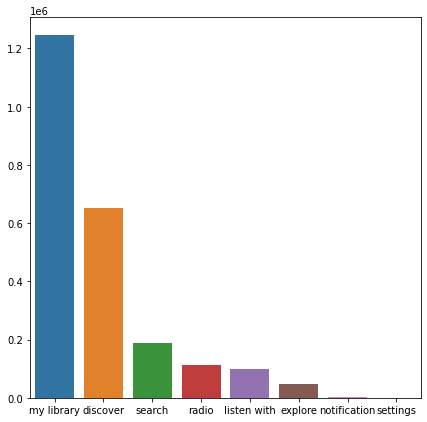

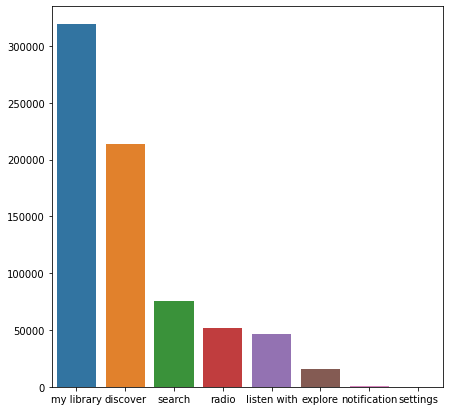

In [30]:
sst_train=train_data['source_system_tab'].value_counts()
sst_test=test_data['source_system_tab'].value_counts()

plt.figure(figsize=(7,7))
sns.barplot(x=sst_train.index,y=sst_train.values,data=train_data)
plt.show()
plt.figure(figsize=(7,7))
sns.barplot(x=sst_test.index,y=sst_test.values,data=test_data)
plt.show()

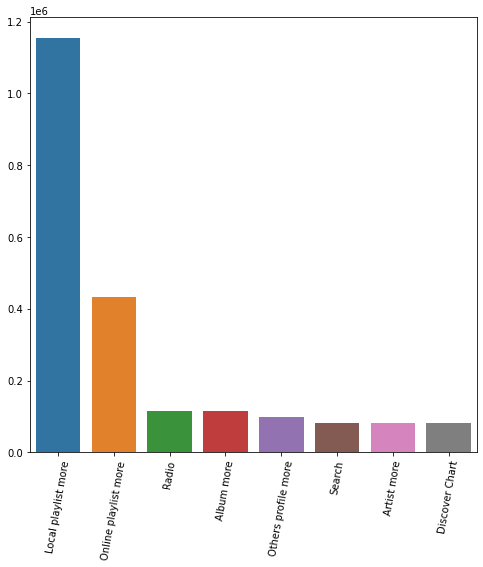

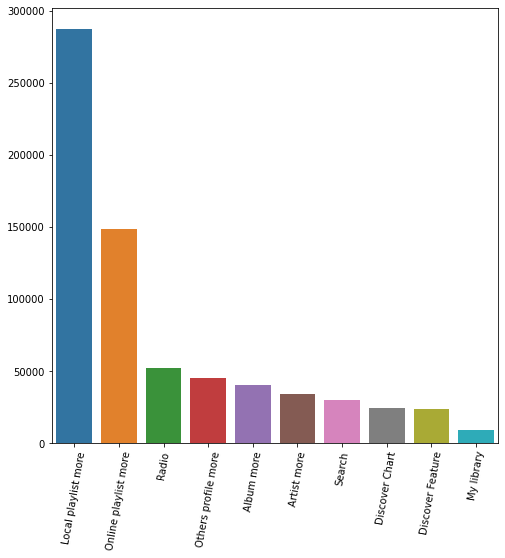

In [31]:
ssn_train=train_data['source_screen_name'].value_counts().head(8)
plt.figure(figsize=(8,8))
sns.barplot(x=ssn_train.index,y=ssn_train.values,data=train_data)
plt.xticks(rotation = 80)
plt.show()

ssn_test=test_data['source_screen_name'].value_counts().head(10)
plt.figure(figsize=(8,8))
sns.barplot(x=ssn_test.index,y=ssn_test.values,data=test_data)
plt.xticks(rotation=80)
plt.show()

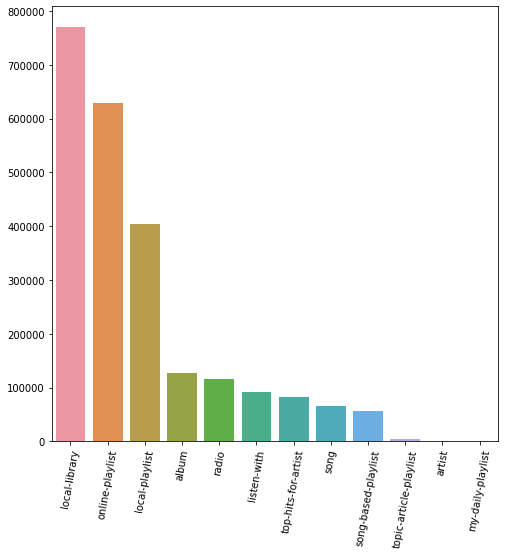

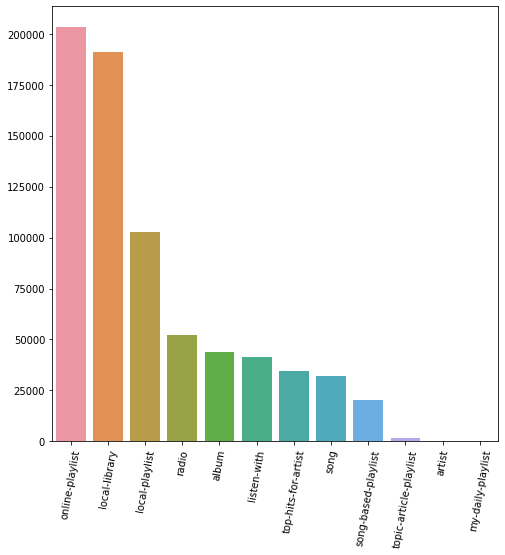

In [32]:
st_train=train_data['source_type'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(x=st_train.index,y=st_train.values,data=train_data)
plt.xticks(rotation=80)
plt.show()

st_test=test_data['source_type'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(x=st_test.index,y=st_test.values,data=test_data)
plt.xticks(rotation=80)
plt.show()

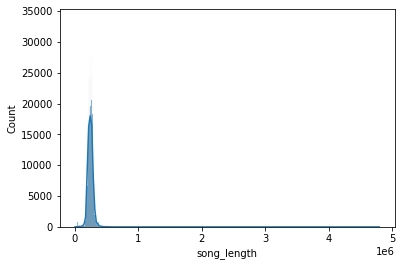

count    2.344896e+06
mean     2.494730e+05
std      4.466589e+04
min      4.109000e+03
25%      2.217270e+05
50%      2.481740e+05
75%      2.750170e+05
max      4.793341e+06
Name: song_length, dtype: float64

In [33]:
sns.histplot(train_data['song_length'],kde=True)
plt.show()
train_data['song_length'].describe()

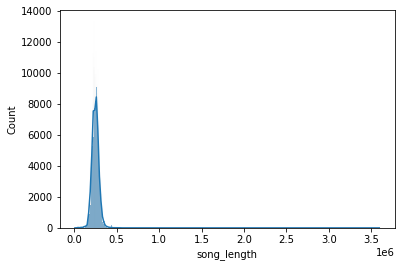

count    7.226210e+05
mean     2.483253e+05
std      4.487076e+04
min      7.000000e+03
25%      2.212040e+05
50%      2.471440e+05
75%      2.735540e+05
max      3.596782e+06
Name: song_length, dtype: float64

In [34]:
sns.histplot(test_data['song_length'],kde=True)
plt.show()
test_data['song_length'].describe()

In [35]:
train_data.drop(['genre_ids','artist_name','composer','lyricist','city','bd'],axis = 1,inplace = True)
test_data.drop(['genre_ids','artist_name','composer','lyricist','city','bd'],axis = 1,inplace = True)

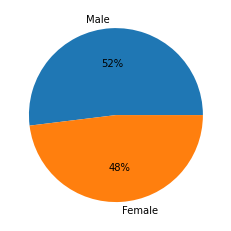

In [36]:
g = train_data['gender'].value_counts()
plt.pie(list(g.values),labels = ['Male','Female'],autopct = '%.0f%%')
plt.show()

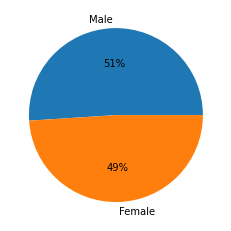

In [37]:
g = test_data['gender'].value_counts()
plt.pie(list(g.values),labels = ['Male','Female'],autopct = '%.0f%%')
plt.show()

In [38]:
train_data.columns

Index(['source_system_tab', 'source_screen_name', 'source_type', 'target',
       'song_length', 'language', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

### ENCODING CATEGORICAL DATA

In [39]:
from sklearn.preprocessing import LabelBinarizer
sst_train=pd.DataFrame(LabelBinarizer().fit_transform(train_data['source_system_tab']))
sst_train.columns=list(train_data['source_system_tab'].value_counts().index)

In [40]:
sst_train.head()

,my library,discover,search,radio,listen with,explore,notification,settings
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [41]:
from sklearn.preprocessing import LabelBinarizer
sst_test=pd.DataFrame(LabelBinarizer().fit_transform(test_data['source_system_tab']))
sst_test.columns=list(test_data['source_system_tab'].value_counts().index)
sst_test.head()

,my library,discover,search,radio,listen with,explore,notification,settings
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [42]:
train_data.drop(['source_screen_name','source_type'],axis=1,inplace=True)
test_data.drop(['source_screen_name','source_type'],axis=1,inplace=True)

In [43]:
train_data.columns

Index(['source_system_tab', 'target', 'song_length', 'language', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date'],
      dtype='object')

In [44]:
lan_train=pd.DataFrame(LabelBinarizer().fit_transform(train_data['language']))


lan_train.columns=['l0','l1','l2','l3','l4','l5','l6','l7','l8','l9']

lan_train.head()

,l0,l1,l2,l3,l4,l5,l6,l7,l8,l9
0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [45]:
lan_test=pd.DataFrame(LabelBinarizer().fit_transform(test_data['language']))


lan_test.columns=['l0','l1','l2','l3','l4','l5','l6','l7','l8','l9']

lan_test.head()

,l0,l1,l2,l3,l4,l5,l6,l7,l8,l9
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [46]:

train_data['gender']=pd.get_dummies(train_data['gender'],drop_first=True)

test_data['gender']=pd.get_dummies(test_data['gender'],drop_first=True)

In [47]:
train_data.columns

Index(['source_system_tab', 'target', 'song_length', 'language', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date'],
      dtype='object')

In [48]:
reg_train=pd.DataFrame(LabelBinarizer().fit_transform(train_data['registered_via']))


reg_train.columns=['r1','r2','r3','r4','r5']

reg_train.head()

,r1,r2,r3,r4,r5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [49]:
reg_test=pd.DataFrame(LabelBinarizer().fit_transform(test_data['registered_via']))


reg_test.columns=['r1','r2','r3','r4','r5']

reg_test.head()

,r1,r2,r3,r4,r5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [50]:
tr=pd.concat([lan_train,reg_train,sst_train],axis=1)



tr.drop(['l0','r1','settings'],axis=1,inplace=True)

tr.head()

,l1,l2,l3,l4,l5,l6,l7,l8,l9,r2,r3,r4,r5,my library,discover,search,radio,listen with,explore,notification
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
te=pd.concat([lan_test,reg_test,sst_test],axis=1)



te.drop(['l0','r1','settings'],axis=1,inplace=True)

te.head()

,l1,l2,l3,l4,l5,l6,l7,l8,l9,r2,r3,r4,r5,my library,discover,search,radio,listen with,explore,notification
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [52]:
train_data.columns

Index(['source_system_tab', 'target', 'song_length', 'language', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date'],
      dtype='object')

In [53]:
train_data['registration_init_time']=pd.to_datetime(train_data['registration_init_time'])

test_data['registration_init_time']=pd.to_datetime(test_data['registration_init_time'])

In [54]:
train_data['expiration_date']=pd.to_datetime(train_data['expiration_date'])

test_data['expiration_date']=pd.to_datetime(test_data['expiration_date'])

In [55]:
import datetime as dt

train_data['duration_days']=(train_data['registration_init_time']-train_data['expiration_date']).dt.days

test_data['duration_days']=(test_data['registration_init_time']-test_data['expiration_date']).dt.days


train_data.drop(['registration_init_time','expiration_date'],axis=1,inplace=True)

test_data.drop(['registration_init_time','expiration_date'],axis=1,inplace=True)

In [56]:
train_data['duration_days']=train_data['duration_days'].apply(lambda x : abs(x))

test_data['duration_days']=test_data['duration_days'].apply(lambda x : abs(x))

In [57]:
train_data.drop(['source_system_tab','language','registered_via'],axis=1,inplace=True)


test_data.drop(['source_system_tab','language','registered_via'],axis=1,inplace=True)

In [58]:
train_data.head()

,target,song_length,gender,duration_days
0,1,229982,0,1
1,1,253492,0,1
2,1,210364,0,1
3,1,240624,0,1
4,0,271255,0,1


In [59]:
test_data.head()

,id,song_length,gender,duration_days
0,134212,234161,1,1
1,407872,309394,1,1
2,46248,218279,1,1
3,1499273,234788,1,1
4,17341,273345,1,1


In [60]:
train=pd.concat([tr,train_data],axis=1)

In [61]:
train.head()

,l1,l2,l3,l4,l5,l6,l7,l8,l9,r2,...,discover,search,radio,listen with,explore,notification,target,song_length,gender,duration_days
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,229982,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,253492,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,210364,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,240624,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,271255,0,1


In [62]:
test=pd.concat([te,test_data],axis=1)
test.head()

,l1,l2,l3,l4,l5,l6,l7,l8,l9,r2,...,discover,search,radio,listen with,explore,notification,id,song_length,gender,duration_days
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,134212,234161,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,407872,309394,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,46248,218279,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1499273,234788,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,17341,273345,1,1


In [63]:
ts=train['song_length'].values.reshape(-1,1)

tes=test['song_length'].values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()

ts=sc.fit_transform(ts)

tes=sc.fit_transform(tes)


train['song_length']=pd.Series(ts.reshape(1,-1)[0])

test['song_length']=pd.Series(tes.reshape(1,-1)[0])

In [64]:
train.head()

,l1,l2,l3,l4,l5,l6,l7,l8,l9,r2,...,discover,search,radio,listen with,explore,notification,target,song_length,gender,duration_days
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0.047163,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.052072,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.043066,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0.049385,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.055781,0,1


In [65]:
test.head()

,l1,l2,l3,l4,l5,l6,l7,l8,l9,r2,...,discover,search,radio,listen with,explore,notification,id,song_length,gender,duration_days
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,134212,0.063280,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,407872,0.084237,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,46248,0.058856,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1499273,0.063455,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,17341,0.074195,1,1


In [66]:
x=train.drop('target',axis=1)

y=train['target']

from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25,random_state=42)

x_train.shape,y_train.shape,x_valid.shape,y_valid.shape

((1758672, 23), (1758672,), (586224, 23), (586224,))

In [67]:
from xgboost import XGBClassifier

xgb=XGBClassifier(use_label_encoder=False)

xgb.fit(x_train,y_train)

[07:01:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

Accuracy score : 63.991580010371464


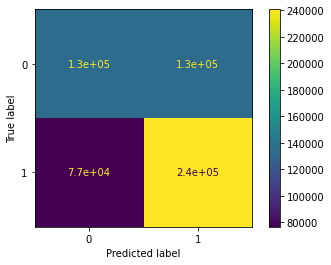

In [68]:
y_pred=xgb.predict(x_valid)

from sklearn.metrics import accuracy_score,confusion_matrix


print('Accuracy score : {}'.format(accuracy_score(y_pred,y_valid)*100))


from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb,x_valid,y_valid)

plt.show() 

In [69]:
t=test.drop("id",axis=1)

test_pred=xgb.predict(t)

In [70]:
test_pred

array([1, 1, 1, ..., 0, 0, 0])

In [71]:
test_id=test['id'].values
test_id

array([ 134212,  407872,   46248, ..., 2159379, 2546833, 2382243],
      dtype=int64)

In [73]:
final_df=pd.DataFrame(test_id,columns=['ID'])
final_df['PREDICTION']=test_pred

final_df.head()

,ID,PREDICTION
0,134212,1
1,407872,1
2,46248,1
3,1499273,1
4,17341,1
